<a href="https://colab.research.google.com/github/nsriniva/DS-Unit-2-Kaggle-Challenge/blob/master/module2-random-forests/LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train = train.set_index('id')
test = test.set_index('id')

train.shape, test.shape

((59400, 40), (14358, 39))

In [3]:
train.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [4]:
import numpy as np
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="TanzaniaWater")


# We will use the lat/long for the basin for the missing lat/long
# Since the basin is either Lake Victoria or Lake Tanganyika for 
# the entries with missing lat/long, we set up a dictionary
# with the lat/long for those 2 locations
# display(out_df[out_df.latitude.isna()].basin.value_counts())
# Lake Victoria      1713
# Lake Tanganyika      99

get_loc = lambda x: geolocator.geocode(x)
get_lat_long = lambda x: (get_loc(x).latitude, get_loc(x).longitude)

locs = {'Lake Victoria':{'latitude':0, 'longitude':0}, 'Lake Tanganyika':{'latitude':0, 'longitude':0}}

for loc in locs:
  locs[loc]['latitude'], locs[loc]['longitude'] = get_lat_long(loc)

# Looking up the data dictionary at https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/#features_list
# Create a list of redundant columns
# recorded_by - constant valued
# num_private - undefined and mostly zero
# extraction_type, extraction_type_group - the same information ia available in extraction_type_class
# payment - same as payment_type
# water_quality - same as quality_group
# quantity - same as quantity_group
# source, source_class - same as source_type
# waterpoint_type - waterpoint_type_group

red_cols = ['recorded_by', 'num_private','extraction_type','extraction_type_group','payment', 'water_quality', 'quantity', 'source', 'source_class', 'waterpoint_type']


# Get a series with the cardinality of the nonnumeric features
cardinality = train.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality > 50
high_card = cardinality[cardinality > 50].index.tolist()
print(high_card)

# Columns with missing data 
nan_drop = ['public_meeting', 'scheme_management', 'scheme_name','permit', 'funder', 'installer', 'subvillage']

def wrangle(in_df, drop = red_cols+nan_drop):

  out_df = in_df.drop(columns=drop).copy()

  # About 3% of the time, latitude has small values near zero,
  # outside Tanzania, so we'll treat these values like zero.
  out_df['latitude'] = out_df['latitude'].replace(-2e-08, 0)
    
  # When columns have zeros and shouldn't, they are like null values.
  # A longitude or latitude of zero is outside Tanzania and therefore wrong.
  # So we will replace the zeros with nulls, and then fix them by using
  # the lat/long for the basin.
  latlong = ['longitude', 'latitude']
  misc = ['construction_year']
  for col in latlong+misc:
      out_df[col] = out_df[col].replace(0, np.nan)

  # Fix missing lat/long values
  for col in latlong:
    out_df.loc[out_df[col].isna(), col] = out_df[out_df[col].isna()].basin.apply(lambda x: locs[x][col])
  
  col = 'construction_year'
  out_df.loc[out_df[col].isna(), col] = 1950
  # Convert date_recorded to datetime
  out_df.date_recorded = out_df.date_recorded.astype('datetime64[ns]')
    
  # Extract components from date_recorded, then drop the original column
  out_df['year_recorded'] = out_df.date_recorded.dt.year
  out_df['month_recorded'] = out_df.date_recorded.dt.month
  out_df['day_recorded'] = out_df.date_recorded.dt.day
  out_df = out_df.drop(columns='date_recorded')
    
  # Engineer feature: how many years from construction_year to date_recorded
  out_df['years'] = out_df.year_recorded - out_df.construction_year


  print(out_df.isna().sum())
  print(out_df.shape)
  # return the wrangled dataframe
  return out_df

['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name']


In [5]:
train = wrangle(train)
test = wrangle(test)

amount_tsh               0
gps_height               0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
construction_year        0
extraction_type_class    0
management               0
management_group         0
payment_type             0
quality_group            0
quantity_group           0
source_type              0
waterpoint_type_group    0
status_group             0
year_recorded            0
month_recorded           0
day_recorded             0
years                    0
dtype: int64
(59400, 26)
amount_tsh               0
gps_height               0
longitude                0
latitude                 0
wpt_name                 0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
war

In [6]:
target = 'status_group'

X = train.drop(columns=[target]).copy()
y = train[target].copy()

In [7]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE

X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=0.8, random_state=42)


In [8]:
baseline_acc = y_train.value_counts(normalize=True)[0]

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5429713804713805


In [9]:
%%time 

from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

model = make_pipeline(
  OrdinalEncoder(), 
  RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=26, min_samples_leaf=2)
)

model.fit(X_train, y_train)

training_acc =  model.score(X_train, y_train)
validation_acc =  model.score(X_val, y_val)


print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Training Accuracy: 0.9408670033670034
Validation Accuracy: 0.8104377104377104
CPU times: user 19.1 s, sys: 304 ms, total: 19.4 s
Wall time: 10.5 s


In [10]:
y_pred = model.predict(test)

submission = pd.DataFrame(index=test.index)
submission['status_group'] = y_pred

submission.head()

,status_group
id,
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional


In [11]:
submission.to_csv('kaggle_10.csv')

from google.colab import files
files.download('kaggle_10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

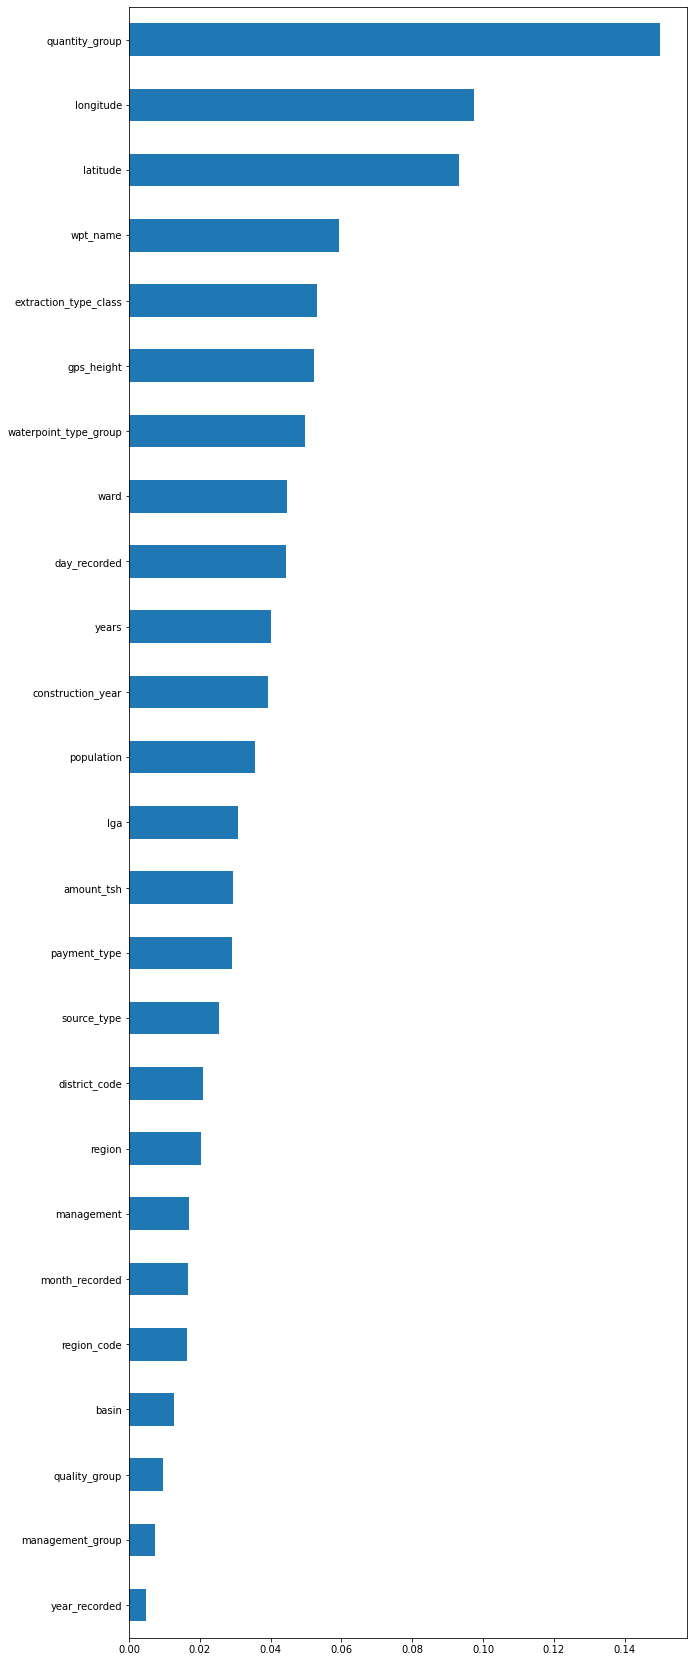

In [12]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
classifier = model.named_steps['randomforestclassifier']

columns = X_val.columns
importances = pd.Series(classifier.feature_importances_, columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh()